# Analysis on IMDb Movie Data

## Group Information
* 1430003004 Jeff 傅永升
* 1430003011 Covey 刘克盾
* 1430003029 Garfield 邬嘉祺
* 1430003030 Frank 邬可夫
* 1430003045 Bill 钟钧儒
## Collecting Data
The data comes from Kaggle, which collects data of 1000 movies.
### Kaggle
Kaggle is a platform for predictive modelling and analytics competitions in which statisticians and data miners compete to produce the best models for predicting and describing the datasets uploaded by companies and users.[Wikipedia]
![](kaggle-data.png)
### IMDb
IMDb, formerly known as Internet Movie Database, is an online database of information related to films, television programs and video games, including cast, production crew, fictional characters, biographies, plot summaries, trivia and reviews, operated by IMDb.com, Inc., a subsidiary of Amazon.[Wikipedia]
![](imdb-mainpage.png)
### Movies on IMDb
![](imdb-movie.png)

## Analysis
Five analyses were brought out by members in the group.
## Analysis on Directors
This analysis was posted by **Junru (Bill) Zhong**, and the following aims were setted.
* Find out which director earned most.
* Find out the genres of the works of the five-most earned directors.
* Estimate how much each of them will get in their next film.
### Technologies
* Python
* Package: pandas

In [1]:
# Import package
import pandas as pd
# Read data
df = pd.read_csv('../Dataset/IMDB-Movie-Data.csv')
print(df.head())

   Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014                121

### Arranging Data
* Use `groupby` method provided by pandas, select all directors and their films' revenue.
* Collect this data with the film count and total revenue of their works.
* Drop the data with value of null.

In [4]:
# List all directors.
directorList = df.groupby('Director')['Revenue (Millions)'].agg(['sum', 'count']).reset_index()
# Delete invalid data
directorList = directorList.dropna()
# Print out result
print(directorList.head())

              Director     sum  count
0           Aamir Khan    1.20      1
1  Abdellatif Kechiche    2.20      1
3           Adam McKay  438.14      4
4        Adam Shankman  157.33      2
5         Adam Wingard   21.07      2


### Sort Data
Sort the data according to the **average revenue** of each film that the directors directed.
* Calculate the average revenue.
* Sort the list.
* Save the first five directors.

In [6]:
# Get average revenue of each director.
directorList['avg'] = directorList['sum'] / directorList['count']
print(directorList.head())

              Director     sum  count      avg
0           Aamir Khan    1.20      1    1.200
1  Abdellatif Kechiche    2.20      1    2.200
3           Adam McKay  438.14      4  109.535
4        Adam Shankman  157.33      2   78.665
5         Adam Wingard   21.07      2   10.535


In [7]:
# Sorting by revenue, list the first five data.
firstFive = directorList.sort_values('avg', ascending=False).head()
print(firstFive)

            Director      sum  count      avg
261    James Cameron   760.51      1  760.510
114  Colin Trevorrow   652.18      1  652.180
341      Joss Whedon  1082.27      2  541.135
377      Lee Unkrich   414.98      1  414.980
208        Gary Ross   408.00      1  408.000


### Genres of Directors' Work
Go back to the original dataset, then match all entries of these directors.

In [8]:
# Searching their works.
directorNames = firstFive['Director']
for directorName in directorNames:
    for index, row in df.iterrows():
        if row['Director'] == directorName:
            print(row['Director'] + ', ' + row['Genre'] + ', ' + row['Title'])

James Cameron, Action,Adventure,Fantasy, Avatar
Colin Trevorrow, Action,Adventure,Sci-Fi, Jurassic World
Joss Whedon, Action,Sci-Fi, The Avengers
Joss Whedon, Action,Adventure,Sci-Fi, Avengers: Age of Ultron
Lee Unkrich, Animation,Adventure,Comedy, Toy Story 3
Gary Ross, Adventure,Sci-Fi,Thriller, The Hunger Games
Gary Ross, Action,Biography,Drama, Free State of Jones


*One movie from **Gary Ross** was not calculated because there is no revenue data.*

### Summary
* In the first five directors, seven of their works were recorded.
* Six of seven films have the genre of **Action**, that means action films are popular.
* Four of seven films have the genre of **Sci-Fi (科幻)**, this genre is also popular.
![](first-two.png)
![](third.png)
![](fourth-fifth.png)

## Analysis on Directors by Rating
This analysis was posted by **Kefu (Frank) Wu**, and the following aims were setted.
* Find out which director is praised most.
* Find out the genres of the works of the five-most praised directors.
* Estimate the rating that new film may get according to the genres of the film and its director.
### Technologies
* Python
* Package: pandas

In [3]:
# Show origin data
print(df.head())

   Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014                121

### Arranging Data
* Use `groupby` method provided by pandas, select all directors and their films' rating.
* Collect this data with the film count and sum up the rating of their works.

In [4]:
# List all directors.
directorList = df.groupby('Director')['Rating'].agg(['sum', 'count']).reset_index()
# Print out result
print(directorList.head())

              Director   sum  count
0           Aamir Khan   8.5      1
1  Abdellatif Kechiche   7.8      1
2            Adam Leon   6.5      1
3           Adam McKay  28.0      4
4        Adam Shankman  12.6      2


### Sort Data
Sort the data according to the **average rating** of each film that the directors directed.
* Calculate the average rating.
* Sort the list.
* Save the top five directors that customers praised.

In [5]:
# Get average rating of each director.
directorList['avg'] = directorList['sum'] / directorList['count']
print(directorList.head())

              Director   sum  count  avg
0           Aamir Khan   8.5      1  8.5
1  Abdellatif Kechiche   7.8      1  7.8
2            Adam Leon   6.5      1  6.5
3           Adam McKay  28.0      4  7.0
4        Adam Shankman  12.6      2  6.3


In [6]:
# Sorting by rating, list the first five data.
firstFive = directorList.sort_values('avg', ascending=False).head()
print(firstFive)

                             Director   sum  count   avg
465                     Nitesh Tiwari   8.8      1  8.80
108                 Christopher Nolan  43.4      5  8.68
392                    Makoto Shinkai   8.6      1  8.60
470                   Olivier Nakache   8.6      1  8.60
194  Florian Henckel von Donnersmarck   8.5      1  8.50


### Genres of Directors' Work
Go back to the original dataset, then match all entries of these directors.

In [23]:
# Searching their works.
directorNames = firstFive['Director']
for directorName in directorNames:
    for index, row in df.iterrows():
        if row['Director'] == directorName:
            print(row['Director'] + ': \n\t' + row['Genre'] + ', ' + row['Title'])

Nitesh Tiwari: 
	Action,Biography,Drama, Dangal
Christopher Nolan: 
	Adventure,Drama,Sci-Fi, Interstellar
Christopher Nolan: 
	Action,Crime,Drama, The Dark Knight
Christopher Nolan: 
	Drama,Mystery,Sci-Fi, The Prestige
Christopher Nolan: 
	Action,Adventure,Sci-Fi, Inception
Christopher Nolan: 
	Action,Thriller, The Dark Knight Rises
Makoto Shinkai: 
	Animation,Drama,Fantasy, Kimi no na wa
Olivier Nakache: 
	Biography,Comedy,Drama, The Intouchables
Florian Henckel von Donnersmarck: 
	Drama,Thriller, The Lives of Others


### Summary
* We find out five director that are favored by their audience.
* In the first five directors, nine of their works were recorded.
* Among the directors, Chrostopher Nolan is the only director that can maintain high average rating after producing more than one film.
* In Nolan's five works, there are three of them are action, which means that Nolan is good at directoring action film.

## Genre's Analysis
The fellowing python code analyze the revenue of each kind of moive in past ten years.
We can easily learn what kind of moive is easiest to make money.

In [1]:
#Import packages

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set(style='white', color_codes=True, font_scale=1.25)
import itertools

In [2]:
#Import the data into a DF and view the first 5 entries

imdb = pd.read_csv('../Dataset/IMDB-Movie-Data.csv')
imdb.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


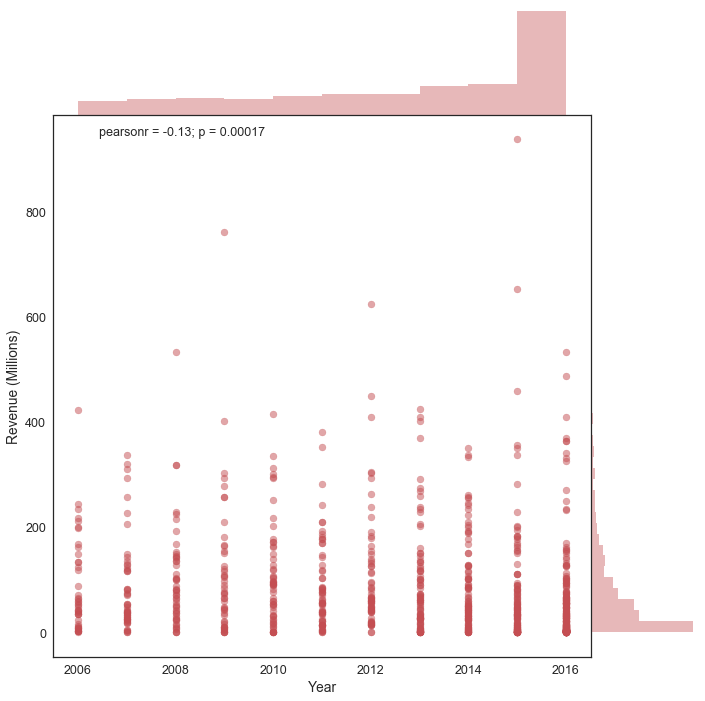

In [3]:
#Plot the Revenue in recent ten years
sns.jointplot(x='Year', y='Revenue (Millions)', data=imdb, alpha=0.5, color='r', size=10, space=0)

In [4]:
#Get unique genres

unique_genres = imdb['Genre'].unique()
individual_genres = []
for genre in unique_genres:
    individual_genres.append(genre.split(','))
individual_genres = list(itertools.chain.from_iterable(individual_genres))
individual_genres = set(individual_genres)
individual_genres


{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

Number of movies in each genre: 

Music 21
Comedy 279
Romance 141
Action 303
Mystery 106
Family 51
Drama 513
Biography 81
Sci-Fi 120
History 29
Musical 5
Adventure 259
Thriller 195
Fantasy 101
War 13
Animation 49
Sport 18
Horror 119
Western 7
Crime 150


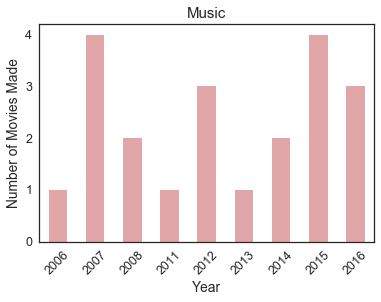

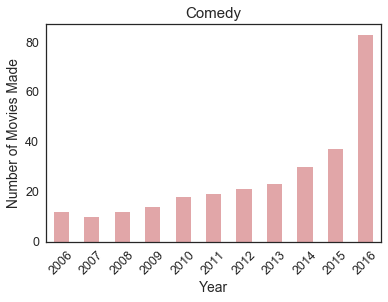

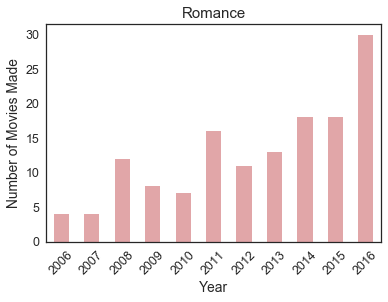

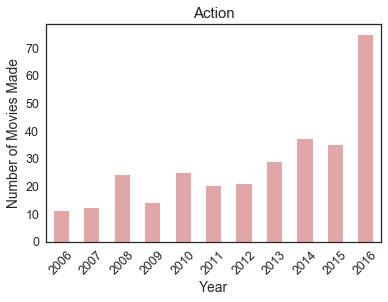

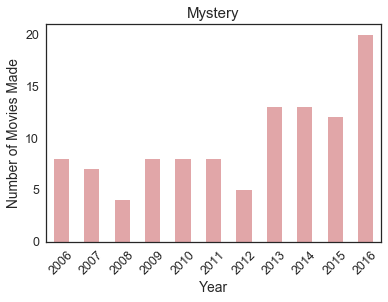

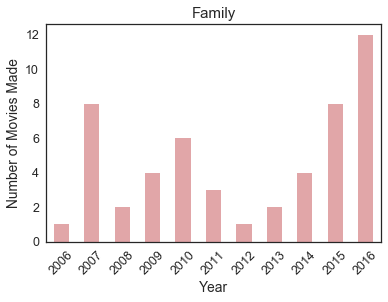

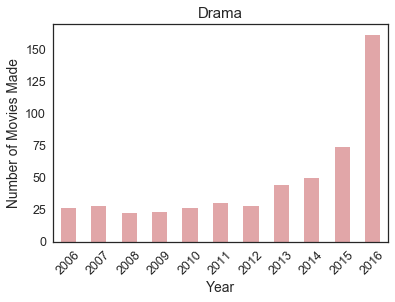

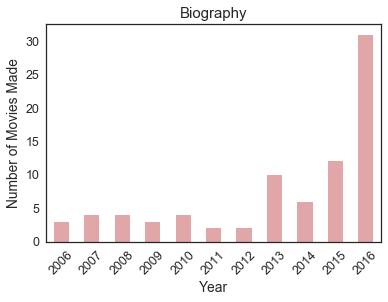

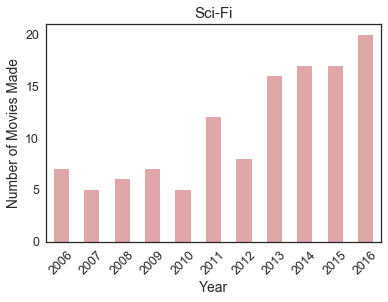

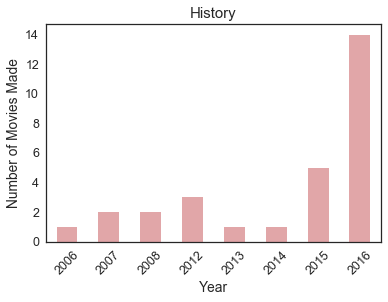

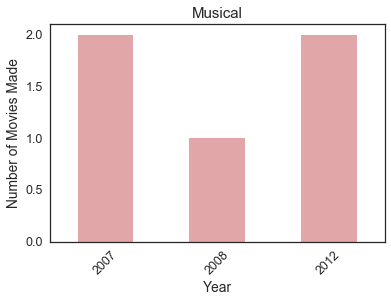

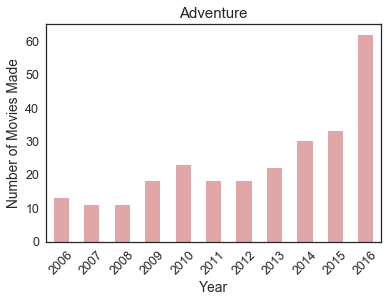

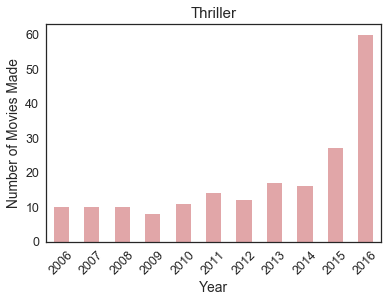

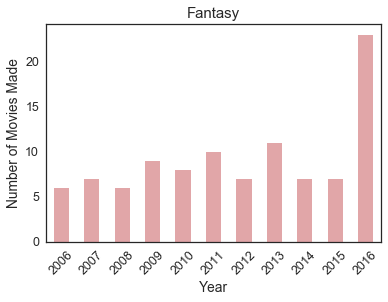

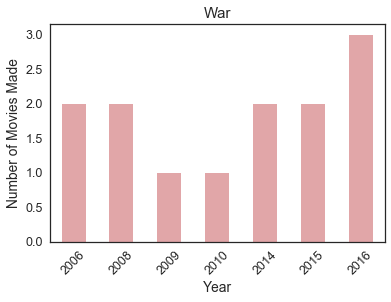

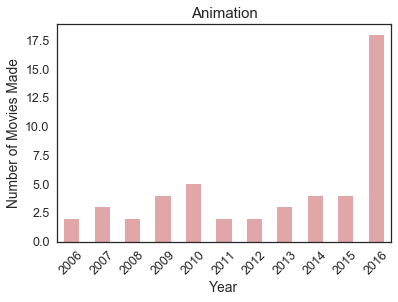

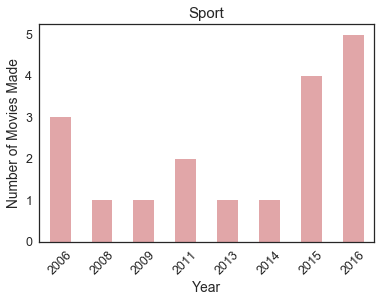

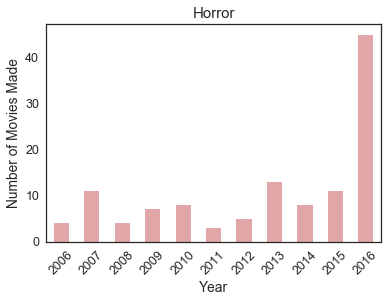

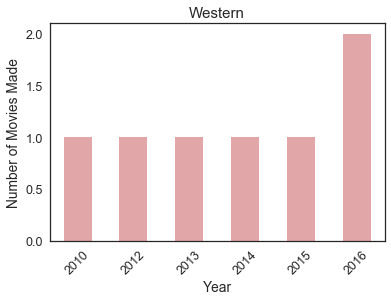

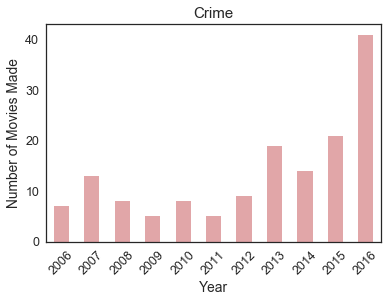

In [5]:
#Now we can iterate through each genre, counting the number of films that contain that genre
#then plot how many films of each genre were made by year onto a bar graph

print('Number of movies in each genre: \n')

for genre in individual_genres:
    current_genre = imdb['Genre'].str.contains(genre).fillna(False)
    plt.figure()
    plt.xlabel('Year')
    plt.ylabel('Number of Movies Made')
    plt.title(str(genre))
    imdb[current_genre].Year.value_counts().sort_index().plot(kind='bar', color='r', alpha=0.5, rot=45)
    print(genre, len(imdb[current_genre]))

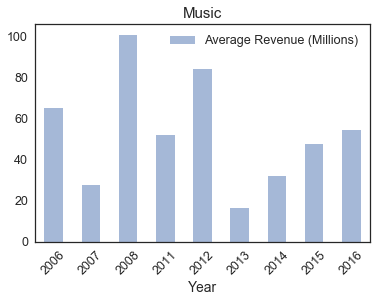

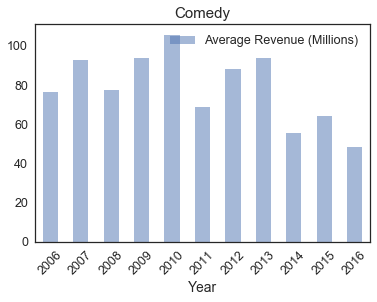

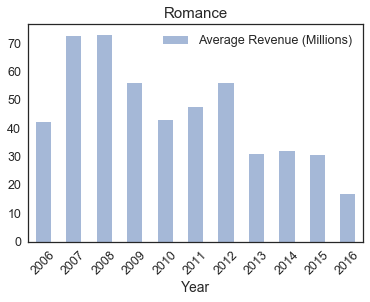

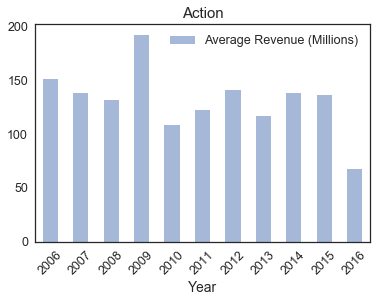

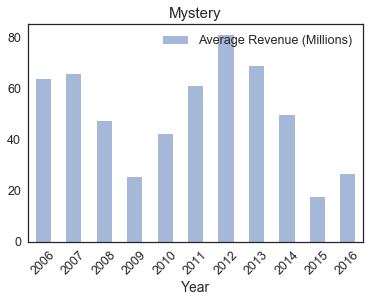

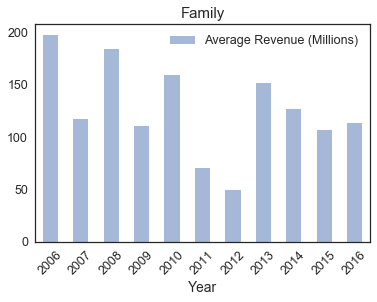

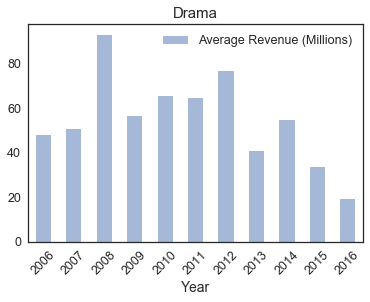

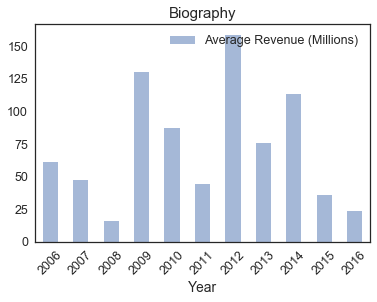

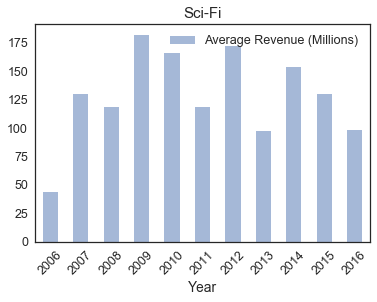

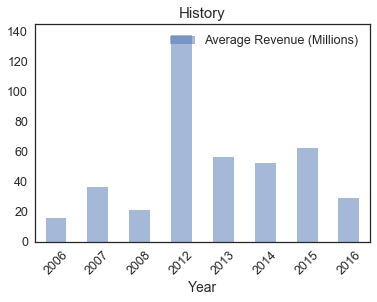

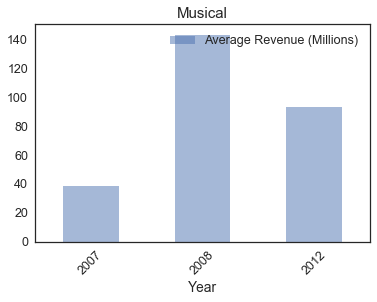

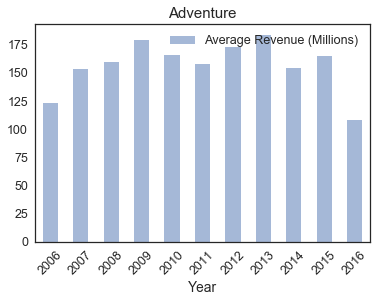

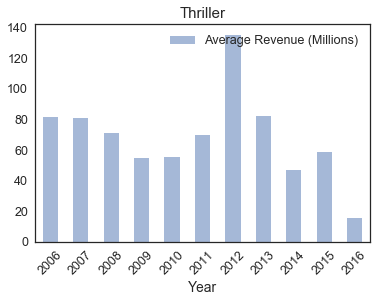

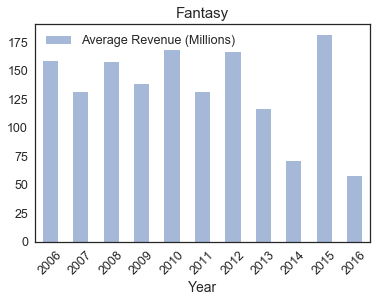

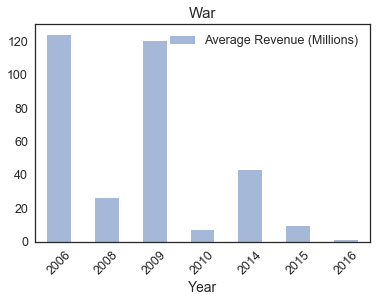

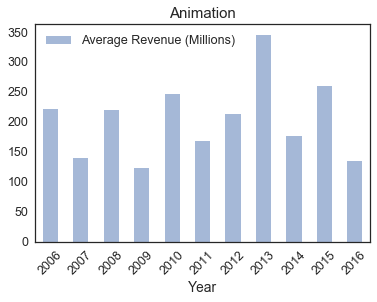

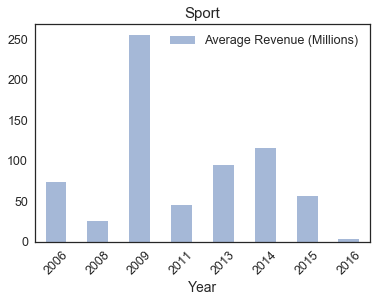

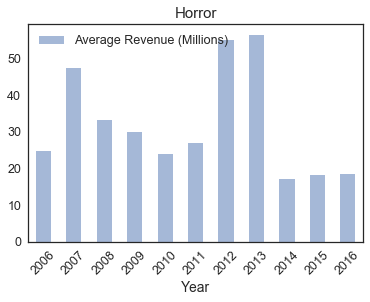

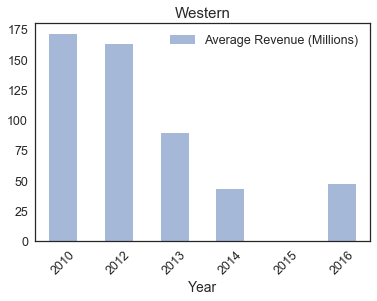

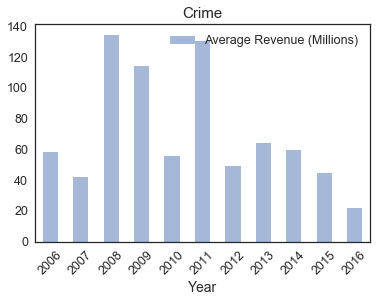

In [6]:
#Count the average revenue of each genre of film by year

year={'Year':[2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]}
YMR=pd.DataFrame(year)
for genre in individual_genres:
    current_genre = imdb['Genre'].str.contains(genre).fillna(False)
    df = imdb[current_genre]
    genre_revenue=df[['Year','Revenue (Millions)']].fillna(0) 
    GR=genre_revenue.groupby('Year')['Revenue (Millions)'].agg(['sum','count']).fillna(0) 
    GR['Average Revenue (Millions)']=GR['sum']/GR['count']
    GR.plot(y='Average Revenue (Millions)',kind='bar', color='b', alpha=0.5, rot=45,title=genre)
    sum = genre_revenue['Revenue (Millions)'].sum()
    count = len(genre_revenue)
    AR=GR['Average Revenue (Millions)'].values
    if len(AR) == 11:
         YMR[genre]=[AR[0],AR[1],AR[2],AR[3],AR[4],AR[5],AR[6],AR[7],AR[8],AR[9],AR[10]]
    elif len(AR) == 6:
        YMR[genre]=[np.nan,np.nan,np.nan,np.nan,AR[0],np.nan,AR[1],AR[2],AR[3],AR[4],AR[5]]
    elif len(AR) ==3:
        YMR[genre]=[np.nan,AR[0],AR[1],np.nan,np.nan,np.nan,AR[2],np.nan,np.nan,np.nan,np.nan]
    elif len(AR) ==9:
        YMR[genre]=[AR[0],AR[1],AR[2],np.nan,np.nan,AR[3],AR[4],AR[5],AR[6],AR[7],AR[8]]
    elif len(AR) ==7:
        YMR[genre]=[AR[0],np.nan,AR[1],AR[2],AR[3],np.nan,np.nan,np.nan,AR[4],AR[5],AR[6]]
    elif len(AR) ==8:
        if genre == 'Western':
            YMR[genre]=[np.nan,np.nan,np.nan,np.nan,AR[0],np.nan,AR[1],AR[2],AR[3],AR[4],AR[5]]
        else:
            YMR[genre]=[AR[0],AR[1],AR[2],np.nan,np.nan,np.nan,AR[3],AR[4],AR[5],AR[6],AR[7]] 

In [7]:
YMR.head(11)

,Year,Music,Comedy,Romance,Action,Mystery,Family,Drama,Biography,Sci-Fi,...,Musical,Adventure,Thriller,Fantasy,War,Animation,Sport,Horror,Western,Crime
0,2006,65.270000,76.336667,42.077500,151.273636,63.836250,197.990000,48.170000,61.343333,43.827143,...,NaN,123.024615,81.673000,158.346667,124.105,221.020000,73.606667,24.682500,NaN,58.191429
1,2007,27.520000,92.704000,72.525000,138.478333,65.448571,117.103750,50.500000,47.240000,129.854000,...,38.610,153.278182,80.611000,131.707143,NaN,138.770000,24.850000,47.376364,NaN,42.171538
2,2008,100.855000,77.442500,73.094167,131.270000,47.355000,183.755000,93.149545,15.692500,118.931667,...,143.700,159.570909,71.285000,158.075000,25.875,219.605000,255.950000,33.157500,NaN,134.736250
3,2009,NaN,93.662857,55.995000,192.460000,25.296250,110.347500,56.290870,129.940000,182.371429,...,NaN,179.450556,54.971250,138.285556,120.520,123.407500,NaN,29.895714,NaN,114.250000
4,2010,NaN,105.794444,42.827143,108.455200,41.920000,159.753333,65.632692,86.905000,165.740000,...,NaN,165.895652,55.117273,168.007500,6.860,246.604000,NaN,23.941250,171.03,55.502500
5,2011,51.780000,68.814211,47.385625,122.569000,61.068750,70.656667,64.749333,44.395000,118.510000,...,NaN,157.611667,69.570000,131.715000,NaN,167.535000,NaN,26.920000,NaN,130.348000
6,2012,84.096667,88.211905,56.084545,140.509524,81.050000,49.000000,76.583214,159.110000,172.352500,...,93.645,172.577778,135.587500,166.368571,NaN,213.345000,44.630000,54.896000,162.80,49.362222
7,2013,16.170000,93.633043,30.794615,116.272759,68.596154,151.730000,40.752273,75.484000,97.255000,...,NaN,184.101818,82.172353,116.452727,NaN,345.760000,95.000000,56.520769,89.29,64.073684
8,2014,31.775000,55.254333,31.982222,138.251892,49.429231,127.000000,54.544000,113.780000,153.545294,...,NaN,154.687333,46.583125,70.882857,42.855,176.850000,115.600000,17.073750,42.62,59.431429
9,2015,47.432500,63.951892,30.486667,136.440571,17.505833,106.370000,33.529730,36.135833,129.831765,...,NaN,164.933636,58.363333,181.960000,9.350,259.877500,56.357500,18.185455,0.00,44.389048


In [8]:
YMR.pop('Year')
YMR.T

,0,1,2,3,4,5,6,7,8,9,10
Music,65.270000,27.520000,100.855000,NaN,NaN,51.780000,84.096667,16.170000,31.775000,47.432500,54.560000
Comedy,76.336667,92.704000,77.442500,93.662857,105.794444,68.814211,88.211905,93.633043,55.254333,63.951892,48.086145
Romance,42.077500,72.525000,73.094167,55.995000,42.827143,47.385625,56.084545,30.794615,31.982222,30.486667,16.657667
Action,151.273636,138.478333,131.270000,192.460000,108.455200,122.569000,140.509524,116.272759,138.251892,136.440571,67.448533
Mystery,63.836250,65.448571,47.355000,25.296250,41.920000,61.068750,81.050000,68.596154,49.429231,17.505833,26.384000
Family,197.990000,117.103750,183.755000,110.347500,159.753333,70.656667,49.000000,151.730000,127.000000,106.370000,113.081667
Drama,48.170000,50.500000,93.149545,56.290870,65.632692,64.749333,76.583214,40.752273,54.544000,33.529730,19.298086
Biography,61.343333,47.240000,15.692500,129.940000,86.905000,44.395000,159.110000,75.484000,113.780000,36.135833,23.669677
Sci-Fi,43.827143,129.854000,118.931667,182.371429,165.740000,118.510000,172.352500,97.255000,153.545294,129.831765,98.070000
History,15.960000,36.635000,21.255000,NaN,NaN,NaN,137.980000,56.670000,52.070000,62.456000,29.237143


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0c62203c8>], dtype=object)

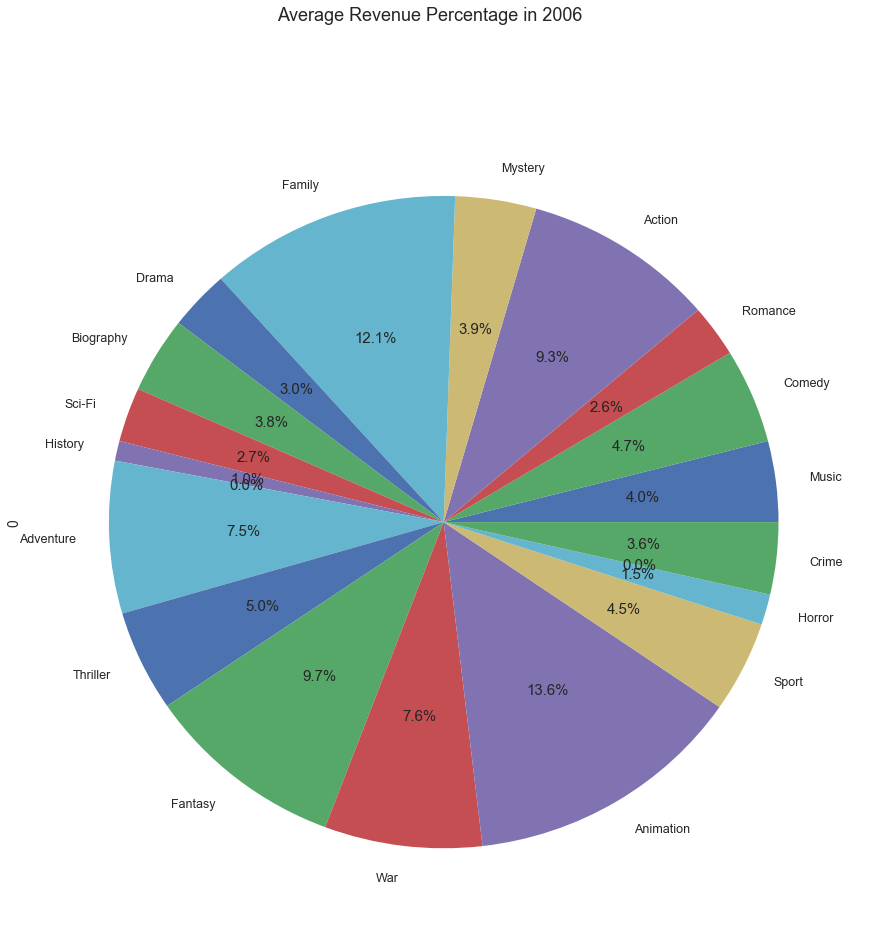

In [9]:
 YMR.T[0].plot.pie(subplots=True, figsize=(15, 15),autopct='%1.1f%%',title='Average Revenue Percentage in 2006')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0c31c3630>], dtype=object)

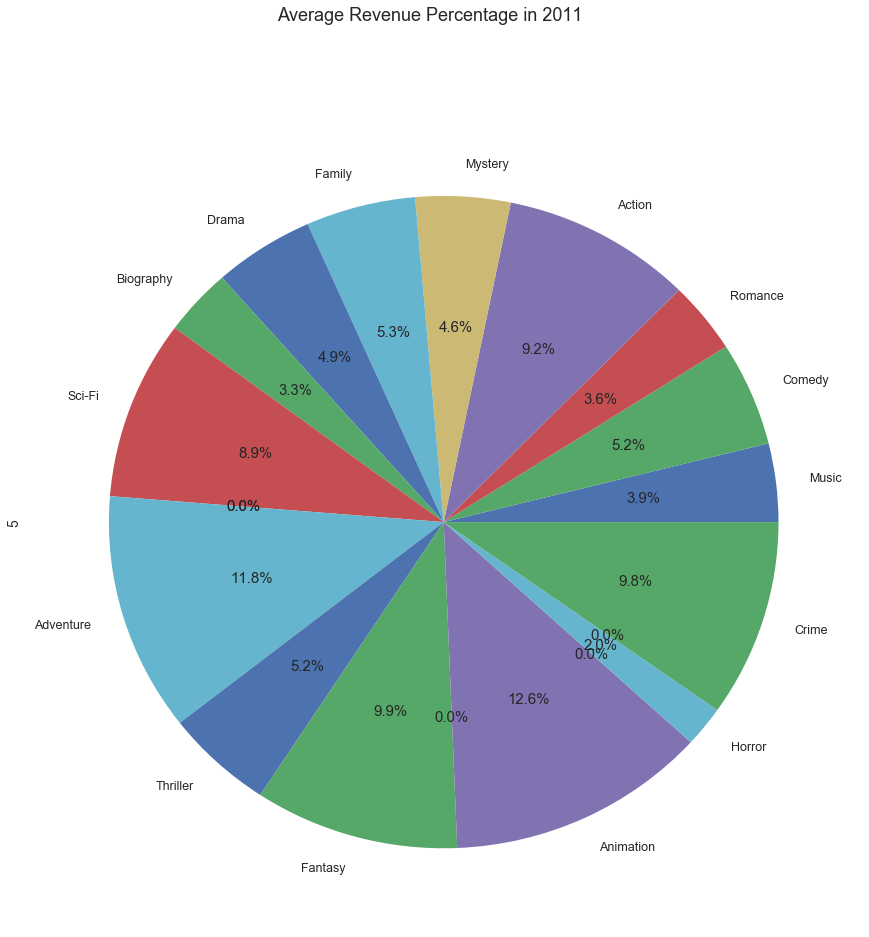

In [10]:
YMR.T[5].plot.pie(subplots=True, figsize=(15, 15),autopct='%1.1f%%',title='Average Revenue Percentage in 2011')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0c311f4e0>], dtype=object)

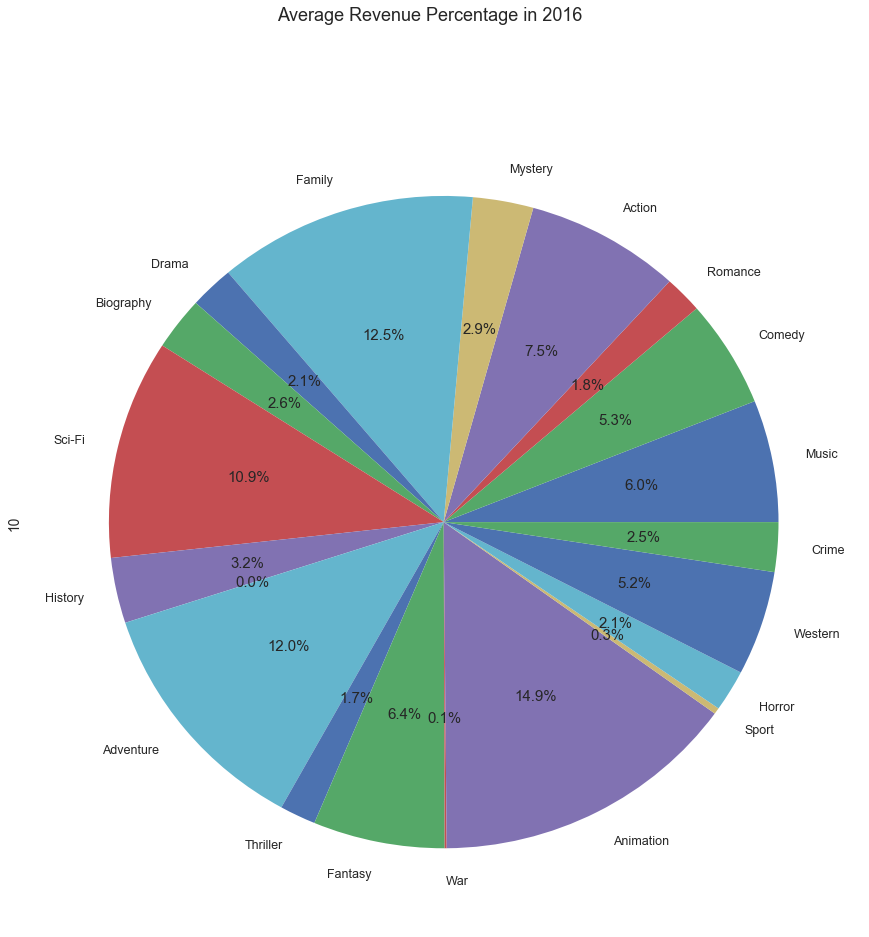

In [11]:
YMR.T[10].plot.pie(subplots=True, figsize=(15, 15),autopct='%1.1f%%',title='Average Revenue Percentage in 2016')

### Summary
By counting the average revenue of each kind of moive, we know that Animation moive is easiest to make money.

However,the average revenue of all kine of moive are trend to decreasing. Maybe we need a revolution in moive industry.

## Analysis on Rating and Metascore
This analysis is provided by Kedun (Covey) Liu, which aims to find out the relationship between metascore and rating.
* The following Excel table analyze the relationship between Rating and MetaScore and find out the outlier.
* We analysis the outlier of what the genre they belong.
* We can finally learn that what kind of movie has the most controversial comment.

### Technologies
* Excel

### Implementation
Import the data into Excel.
![](excel-table.png)

Then, we remove the line with empty value of MetaScore because in this case, we require the data of MetaScore. After remove, we get 936 valid record.

Then, we user the Excel internal function to draw the scatter diagram of the data and draw the line of **linear regression**
![](linear-regreesion.png)

The regression function is `y = 11.618x – 19.193`, where x is rating and y is metascore.

We calculate the absolute value between actual value and linear regression and count the number of record.
![](abs-value.png)

We assume that the top 5% and lowest 5% as the outlier.

So, we need to get about 10% of data: 20 is a suitable different.

We first analysis the top 5% (different >20) of the data, which mean “Low Rating but Has High MetaScore”.

We get:
![](5-precent.png)


**We can clear know that Drama is the most common Genre in this case.**

Then, we analysis the lowest 5% (different <-20) of the data, which mean “High Rating but Has Low MetaScore”.

We get:
![](high.png)

**In this case, we also find that Drama is the most common Genre.**

### Summary
By analysis the result, we can conclude that Drama Movie has the most controversial comment. Since it has the most gap between Rating and MetaScore. It means the evaluation of Drama Movie is various among people.

For Drama movie, we should carefully consider the Rating and MetaScore, because it has the most possibility that is a stray value.